In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 98% 145M/149M [00:02<00:00, 54.1MB/s]
100% 149M/149M [00:02<00:00, 53.0MB/s]


In [ ]:
def get_class_paths(path):
  classes=[]
  class_path=[]
  for label in os.listdir(path):
    label_path = os.path.join(path,label)
    if os.path.isdir(label_path):
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path,image)
        classes.append(label)
        class_path.append(image_path)
  df=pd.DataFrame({
      'Class Path': class_path,
      'Class': classes
  })
  return df

In [ ]:
tr_df = get_class_paths("/content/Training")

In [ ]:
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_0794.jpg,notumor
1,/content/Training/notumor/Tr-no_1039.jpg,notumor
2,/content/Training/notumor/Tr-no_0972.jpg,notumor
3,/content/Training/notumor/Tr-no_0559.jpg,notumor
4,/content/Training/notumor/Tr-no_1252.jpg,notumor
...,...,...
5707,/content/Training/glioma/Tr-gl_0255.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0182.jpg,glioma
5709,/content/Training/glioma/Tr-gl_0553.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0380.jpg,glioma


In [ ]:
ts_df=get_class_paths("/content/Testing")
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0097.jpg,notumor
1,/content/Testing/notumor/Te-no_0301.jpg,notumor
2,/content/Testing/notumor/Te-noTr_0000.jpg,notumor
3,/content/Testing/notumor/Te-no_0222.jpg,notumor
4,/content/Testing/notumor/Te-no_0139.jpg,notumor
...,...,...
1306,/content/Testing/glioma/Te-gl_0280.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0163.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0194.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0146.jpg,glioma


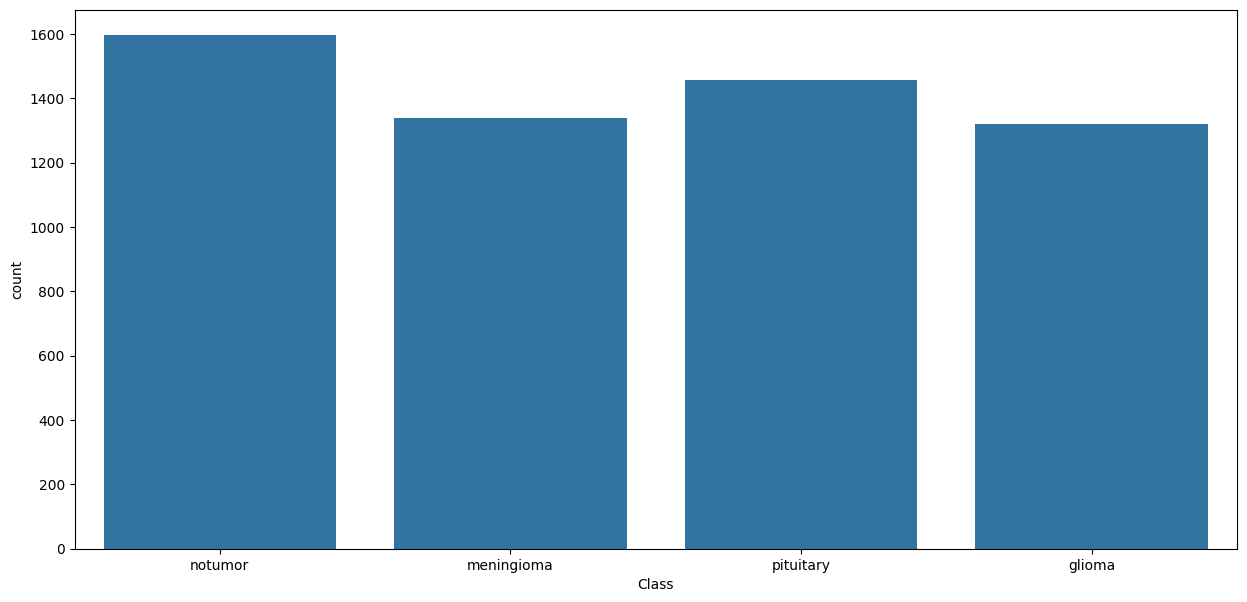

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df,x=tr_df['Class'])

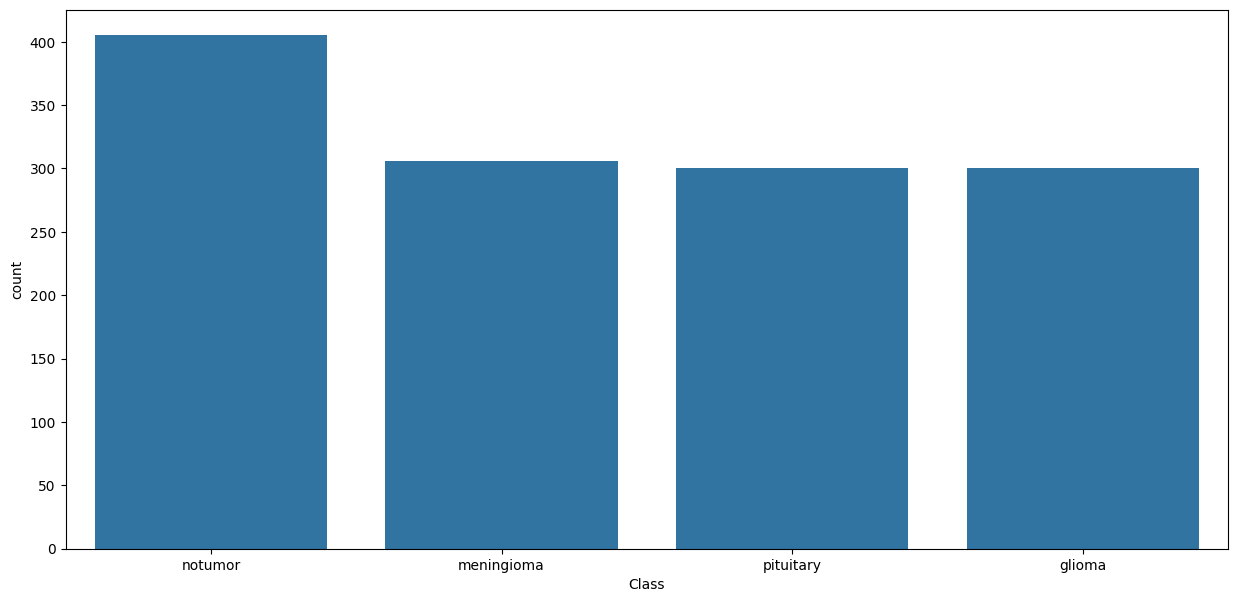

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df,x=ts_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
valid_df, ts_df = train_test_split(ts_df,train_size=0.5,stratify=ts_df['Class'])


In [ ]:
valid_df

,Class Path,Class
624,/content/Testing/meningioma/Te-me_0061.jpg,meningioma
498,/content/Testing/meningioma/Te-me_0059.jpg,meningioma
588,/content/Testing/meningioma/Te-me_0132.jpg,meningioma
216,/content/Testing/notumor/Te-no_0285.jpg,notumor
1093,/content/Testing/glioma/Te-gl_0077.jpg,glioma
...,...,...
429,/content/Testing/meningioma/Te-me_0084.jpg,meningioma
762,/content/Testing/pituitary/Te-pi_0234.jpg,pituitary
625,/content/Testing/meningioma/Te-me_0278.jpg,meningioma
811,/content/Testing/pituitary/Te-pi_0219.jpg,pituitary


In [ ]:
ts_df

,Class Path,Class
408,/content/Testing/meningioma/Te-me_0168.jpg,meningioma
1221,/content/Testing/glioma/Te-gl_0198.jpg,glioma
612,/content/Testing/meningioma/Te-me_0054.jpg,meningioma
1076,/content/Testing/glioma/Te-gl_0078.jpg,glioma
1046,/content/Testing/glioma/Te-gl_0062.jpg,glioma
...,...,...
497,/content/Testing/meningioma/Te-meTr_0006.jpg,meningioma
518,/content/Testing/meningioma/Te-me_0101.jpg,meningioma
822,/content/Testing/pituitary/Te-pi_0271.jpg,pituitary
509,/content/Testing/meningioma/Te-me_0199.jpg,meningioma


In [ ]:
batch_size = 32

img_size = (299,299)
image_generator = ImageDataGenerator(rescale=1/255,brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col ='Class Path',
                                             y_col = 'Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col ='Class Path',
                                             y_col = 'Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col ='Class Path',
                                             y_col = 'Class',
                                             batch_size=16,
                                             target_size=img_size,shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


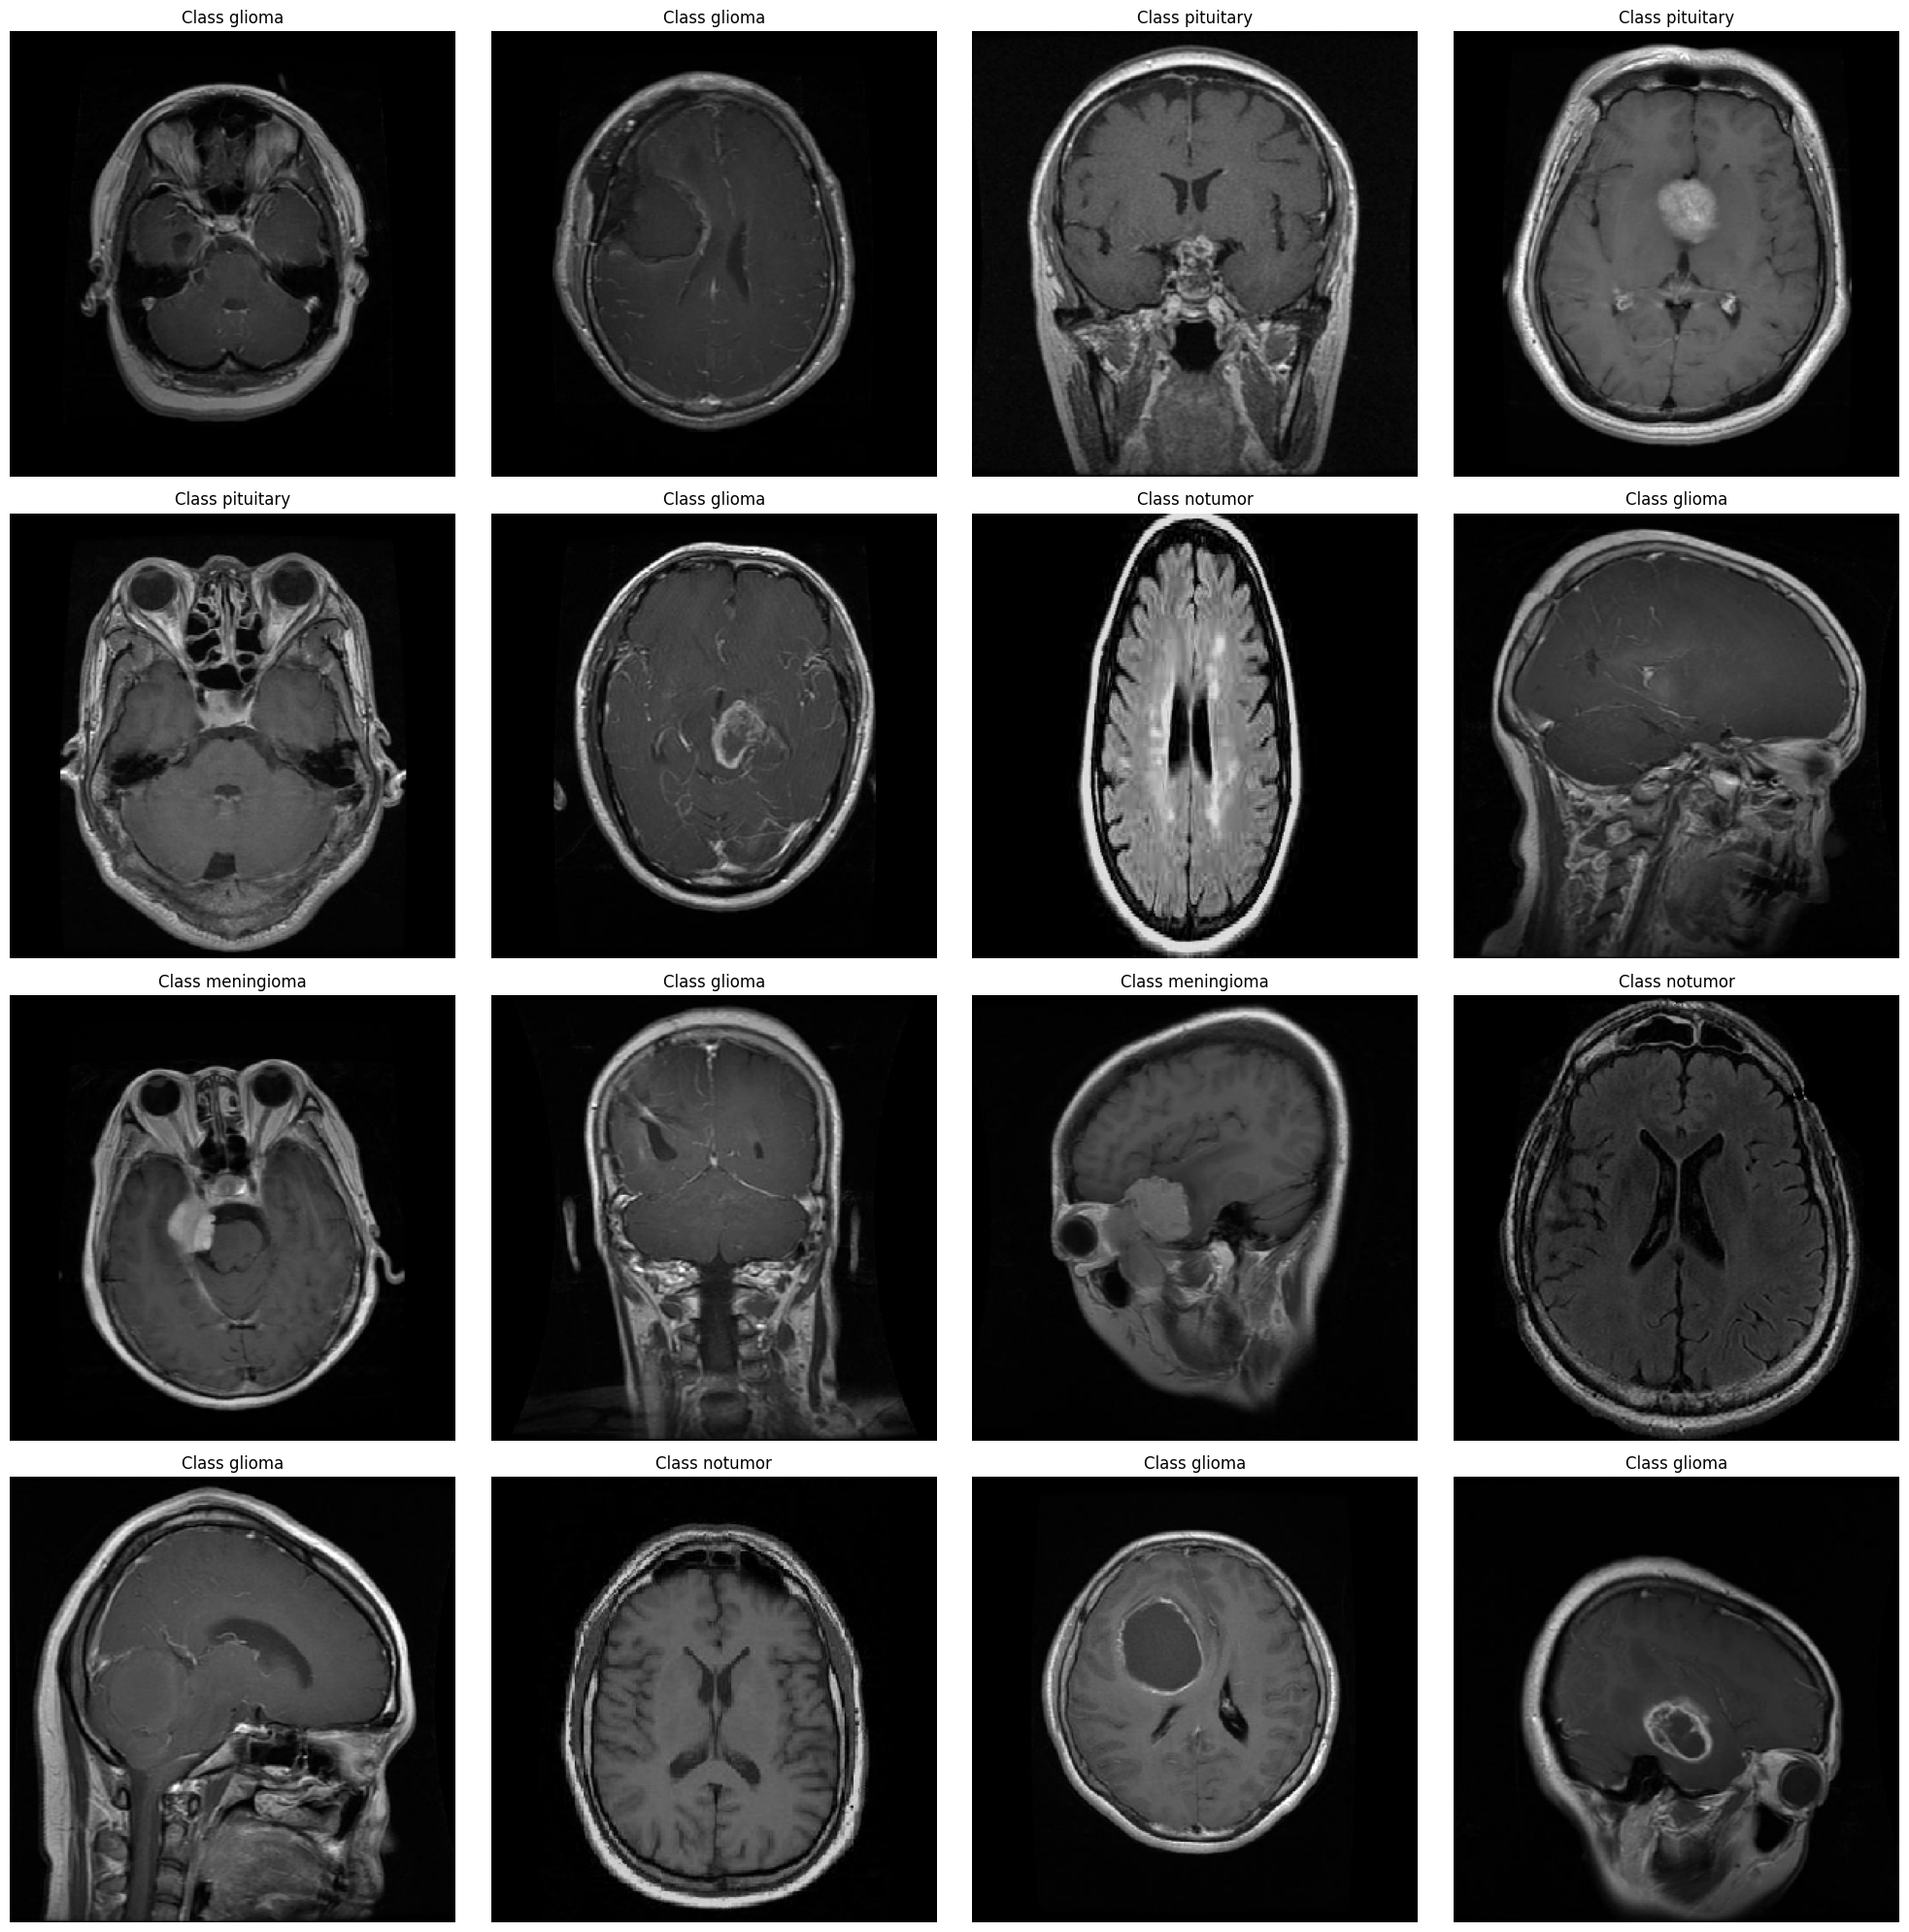

In [ ]:
plt.figure(figsize=(20,20))
for i in range(16):
  plt.subplot(4,4,i+1)
  batch = next(tr_gen)
  image=batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  class_index = np.argmax(label)
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())
  index_position = class_indices.index(class_index)
  class_name= class_names[index_position]

  plt.title(f"Class {class_name}")
  plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
img_shape = (299,299,3)

base_model = tf.keras.applications.Xception(include_top =False,
                                            weights="imagenet",
                                            input_shape=img_shape,
                                            pooling = 'max')

model = Sequential([base_model,
                    Flatten(),
                    Dropout(rate=0.3),
                    Dense(128,activation ='relu'),
                    Dropout(rate=0.25),
                    Dense(4,activation='softmax')])



83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
model.compile(Adamax(learning_rate=0.001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy',
              Precision(),
              Recall()])

In [ ]:
hist = model.fit(tr_gen,epochs=10,validation_data=valid_gen)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.6774 - loss: 0.8445 - precision: 0.8430 - recall: 0.5268 - val_accuracy: 0.9389 - val_loss: 0.2336 - val_precision: 0.9443 - val_recall: 0.9313
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 146s 808ms/step - accuracy: 0.9580 - loss: 0.1389 - precision: 0.9609 - recall: 0.9539 - val_accuracy: 0.9557 - val_loss: 0.1470 - val_precision: 0.9557 - val_recall: 0.9557
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 147s 812ms/step - accuracy: 0.9877 - loss: 0.0389 - precision: 0.9881 - recall: 0.9858 - val_accuracy: 0.9756 - val_loss: 0.0608 - val_precision: 0.9771 - val_recall: 0.9756
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 205s 830ms/step - accuracy: 0.9944 - loss: 0.0177 - precision: 0.9944 - recall: 0.9939 - val_accuracy: 0.9802 - val_loss: 0.0589 - val_precision: 0.9802 - val_recall: 0.9802
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 153s 847ms/step - accuracy: 0.9944 - loss: 0.0153 - precision: 0.9945 - recall: 0.9942 - val_accuracy: 0.9847 - val_lo

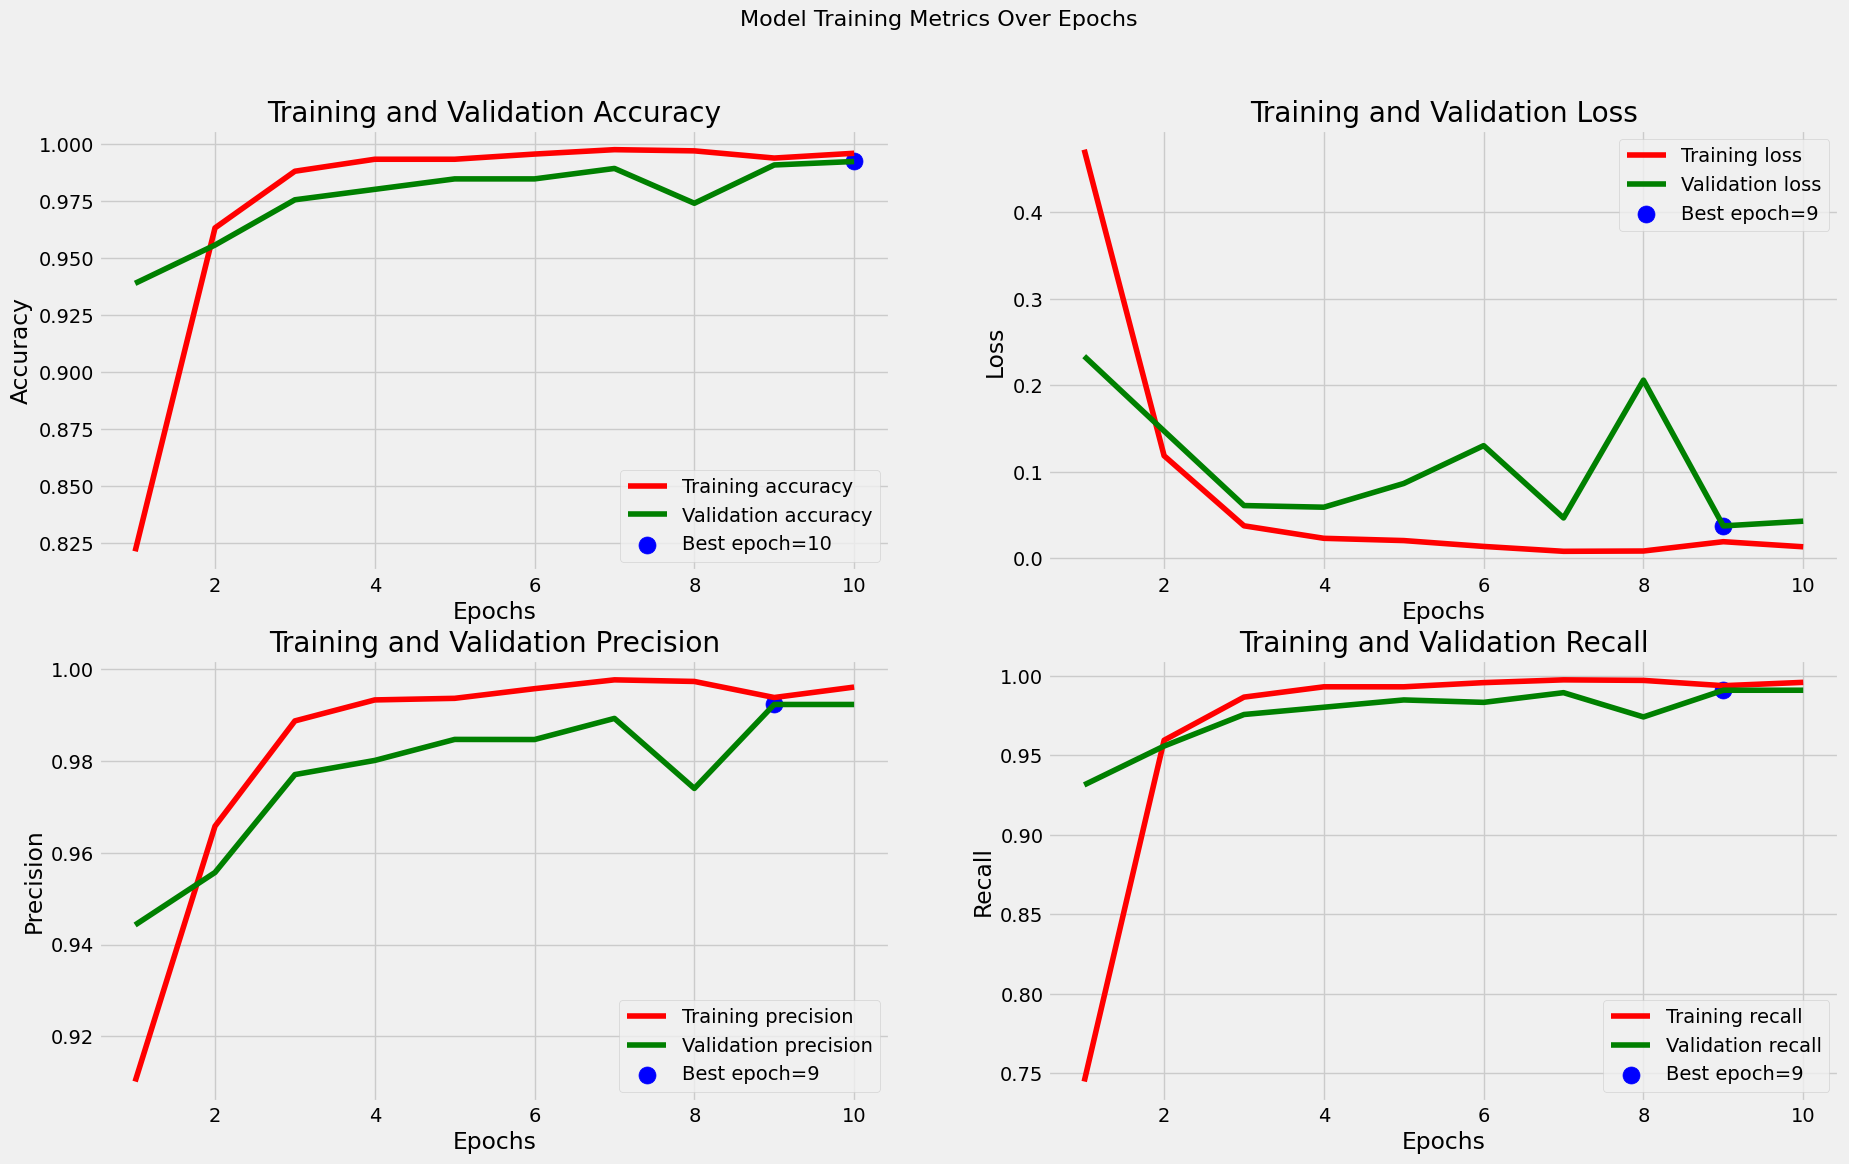

In [ ]:
metrics = ['accuracy','loss','precision','recall']
tr_metrics = {m:hist.history[m] for m in metrics}
val_metrics = {m:hist.history[f'val_{m}'] for m in metrics}

best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx+1
  best_values[m] = val_metrics[m][idx]

plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics,1):
  plt.subplot(2,2,i)
  epochs = range(1,len(tr_metrics[metric])+1)
  plt.plot(epochs, tr_metrics[metric],'r', label = f'Training {metric}')
  plt.plot(epochs, val_metrics[metric],'g',label = f'Validation {metric}')
  plt.scatter(best_epochs[metric],best_values[metric],s=150,c='blue',
              label = f'Best epoch={best_epochs[metric]}')
  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs',fontsize=16)
plt.show()


In [ ]:
train_score = model.evaluate(tr_gen,verbose=1)
valid_score = model.evaluate(valid_gen,verbose=1)
test_score = model.evaluate(ts_gen,verbose=1)

print(f"Train Accuracy:{train_score[1]*100:.2f}%")
print(f'Train Loss:{train_score[0]:.4f}')
print(f"\n\nVal Accuracy:{valid_score[1]*100:.2f}%")
print(f'Val Loss:{valid_score[0]:.4f}')
print(f"\n\nTest Accuracy:{test_score[1]*100:.2f}%")
print(f'Test Loss:{test_score[0]:.4f}')

179/179 ━━━━━━━━━━━━━━━━━━━━ 49s 270ms/step - accuracy: 0.9979 - loss: 0.0086 - precision: 0.9979 - recall: 0.9977
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step - accuracy: 0.9942 - loss: 0.0476 - precision: 0.9942 - recall: 0.9939
 1/41 ━━━━━━━━━━━━━━━━━━━━ 8s 205ms/step - accuracy: 1.0000 - loss: 8.9553e-06 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.9957 - loss: 0.0153 - precision: 0.9957 - recall: 0.9924
Train Accuracy:99.77%
Train Loss:0.0090


Val Accuracy:99.08%
Val Loss:0.0712


Test Accuracy:99.09%
Test Loss:0.0315


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step


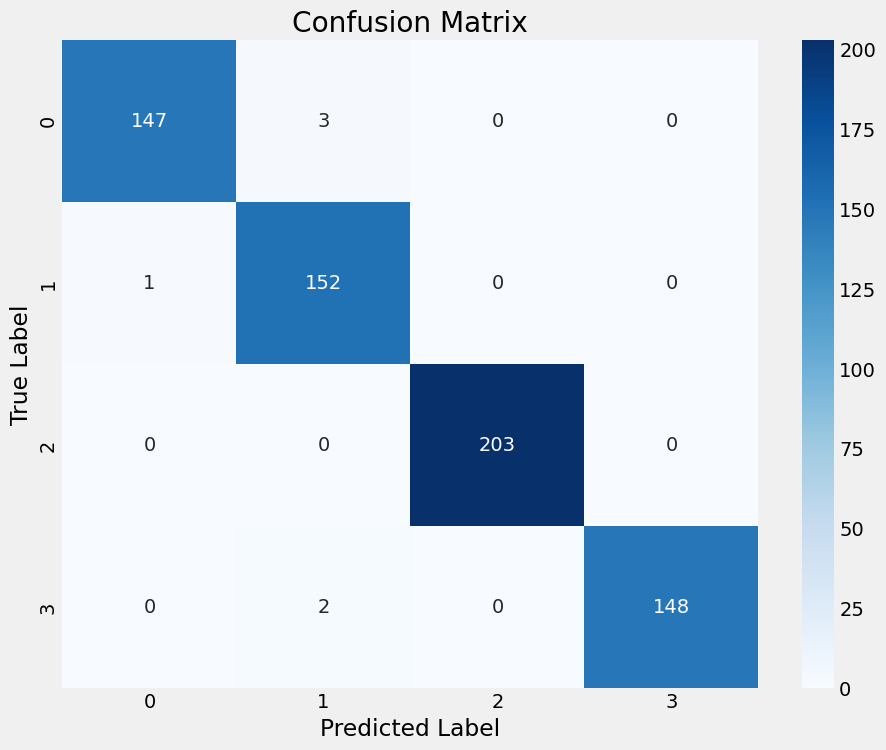

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds,axis=1)

class_dict = {
    0:'glioma',
    1:'meaningioma',
    2:'no_tumor',
    3:'pituitary'
}

cm = confusion_matrix(ts_gen.classes,y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from PIL import Image

def predict(img_path:str)-> None:
  labels = list(class_dict.keys())
  plt.figure(figsize=(6,8))
  img = Image.open(img_path)
  resized_img = img.resize((299,299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array,axis=0)/255.0

  predicitions = model.predict(img_array)
  probabilities = list(predicitions[0])

  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  plt.subplot(2,1,1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  plt.subplot(2,1,2)
  bars = plt.barh(labels,probabilities)
  plt.xlabel("Probability",fontsize=15)
  plt.title("Class Probabilities")

  ax = plt.gca()
  ax.bar_label(bars,fmt="%.2f")

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


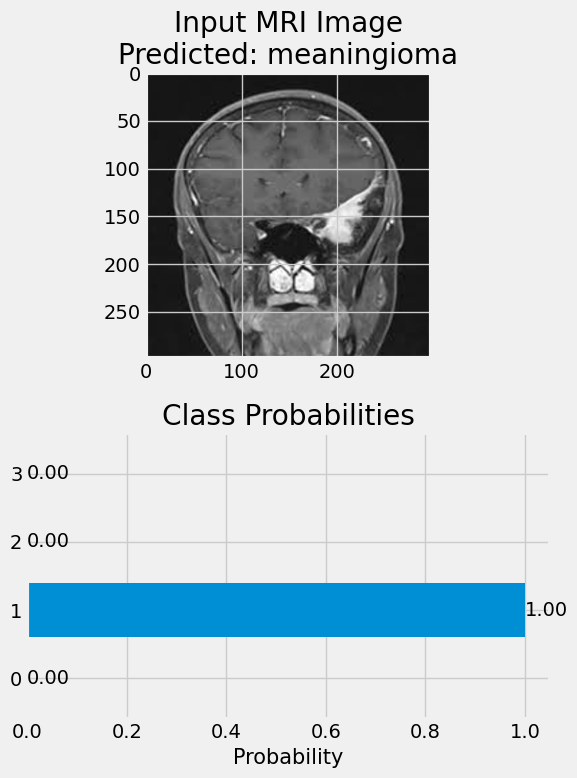


Predicted tumor type: meaningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0003.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


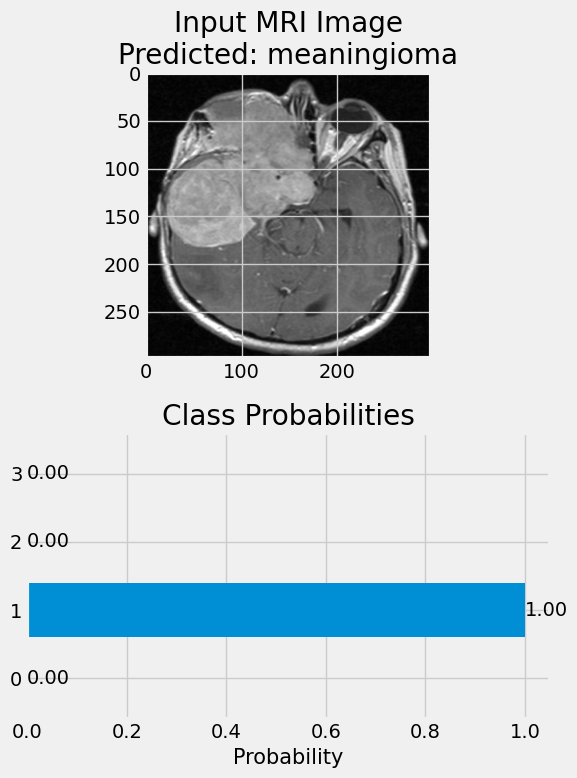


Predicted tumor type: meaningioma


In [ ]:
predict("/content/Testing/meningioma/Te-me_0018.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


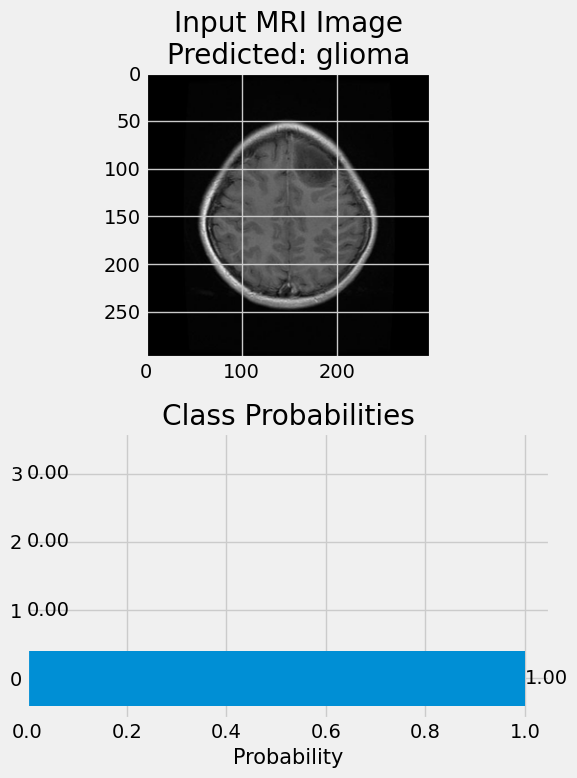


Predicted tumor type: glioma


In [ ]:
predict("/content/Testing/glioma/Te-glTr_0005.jpg")

In [ ]:
model.save_weights("xception_model.weights.h5")

In [ ]:
from google.colab import files

files.download("xception_model.weights.h5")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [ ]:
batch_size = 16
img_size = (224,224)
image_generator = ImageDataGenerator(rescale=1/255,brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col ='Class Path',
                                             y_col = 'Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col ='Class Path',
                                             y_col = 'Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col ='Class Path',
                                             y_col = 'Class',
                                             batch_size=16,
                                             target_size=img_size,shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(512,(3,3), padding = 'same',input_shape=(224,224,3),activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(256,(3,3), padding = 'same',activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128,(3,3), padding = 'same',activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64,(3,3), padding = 'same',activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4,activation ='softmax'))

cnn_model.compile(Adamax(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy',Precision(), Recall()])

cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn_model.fit(tr_gen, epochs =10, validation_data= valid_gen)

Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.7370 - loss: 1.3716 - precision_1: 0.7818 - recall_1: 0.6417

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 125s 349ms/step - accuracy: 0.7370 - loss: 1.3710 - precision_1: 0.7818 - recall_1: 0.6418 - val_accuracy: 0.7191 - val_loss: 0.9851 - val_precision_1: 0.7396 - val_recall_1: 0.6809
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 123s 296ms/step - accuracy: 0.8068 - loss: 0.7892 - precision_1: 0.8280 - recall_1: 0.7778 - val_accuracy: 0.8122 - val_loss: 0.7199 - val_precision_1: 0.8366 - val_recall_1: 0.7740
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 296ms/step - accuracy: 0.8525 - loss: 0.6017 - precision_1: 0.8657 - recall_1: 0.8281 - val_accuracy: 0.8336 - val_loss: 0.6032 - val_precision_1: 0.8498 - val_recall_1: 0.8122
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 106s 295ms/step - accuracy: 0.8798 - loss: 0.4973 - precision_1: 0.8894 - recall_1: 0.8667 - val_accuracy: 0.8473 - val_loss: 0.5410 - val_precision_1: 0.8549 - val_recall_1: 0.8366
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 141s 291ms/step - accuracy: 0.9012 - loss: 0.4166 - precision_1: 0.9090 - recall_1:

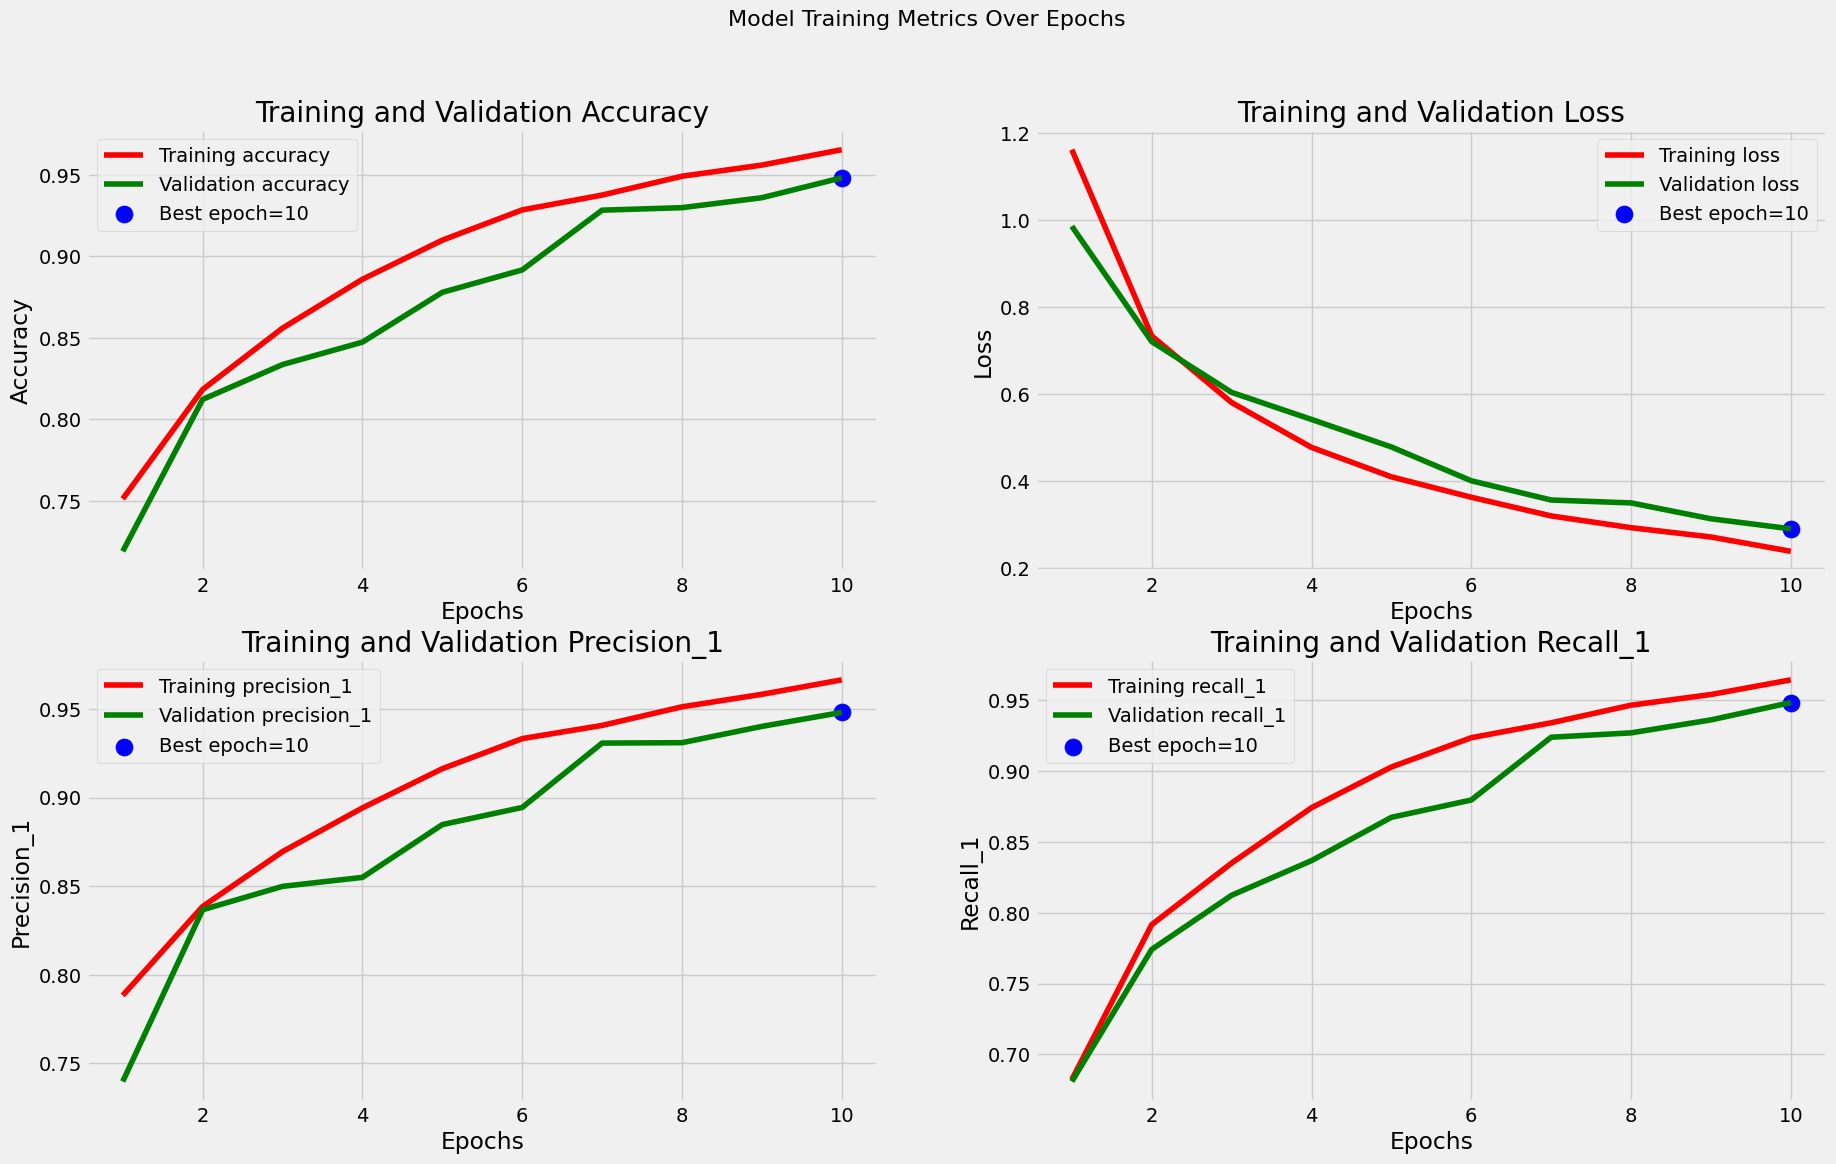

In [ ]:
metrics = ['accuracy','loss','precision_1','recall_1']
tr_metrics = {m:history.history[m] for m in metrics}
val_metrics = {m:history.history[f'val_{m}'] for m in metrics}

best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx+1
  best_values[m] = val_metrics[m][idx]

plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics,1):
  plt.subplot(2,2,i)
  epochs = range(1,len(tr_metrics[metric])+1)
  plt.plot(epochs, tr_metrics[metric],'r', label = f'Training {metric}')
  plt.plot(epochs, val_metrics[metric],'g',label = f'Validation {metric}')
  plt.scatter(best_epochs[metric],best_values[metric],s=150,c='blue',
              label = f'Best epoch={best_epochs[metric]}')
  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs',fontsize=16)
plt.show()


In [ ]:
train_score = cnn_model.evaluate(tr_gen,verbose=1)
valid_score = cnn_model.evaluate(valid_gen,verbose=1)
test_score = cnn_model.evaluate(ts_gen,verbose=1)

print(f"Train Accuracy:{train_score[1]*100:.2f}%")
print(f'Train Loss:{train_score[0]:.4f}')
print(f"\n\nVal Accuracy:{valid_score[1]*100:.2f}%")
print(f'Val Loss:{valid_score[0]:.4f}')
print(f"\n\nTest Accuracy:{test_score[1]*100:.2f}%")
print(f'Test Loss:{test_score[0]:.4f}')

357/357 ━━━━━━━━━━━━━━━━━━━━ 28s 77ms/step - accuracy: 0.9840 - loss: 0.1844 - precision_1: 0.9850 - recall_1: 0.9836
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9232 - loss: 0.3443 - precision_1: 0.9232 - recall_1: 0.9232
 1/41 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.8750 - loss: 1.0584 - precision_1: 0.8750 - recall_1: 0.8750

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9478 - loss: 0.3045 - precision_1: 0.9492 - recall_1: 0.9475
Train Accuracy:98.42%
Train Loss:0.1861


Val Accuracy:94.81%
Val Loss:0.2910


Test Accuracy:96.65%
Test Loss:0.2316


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step


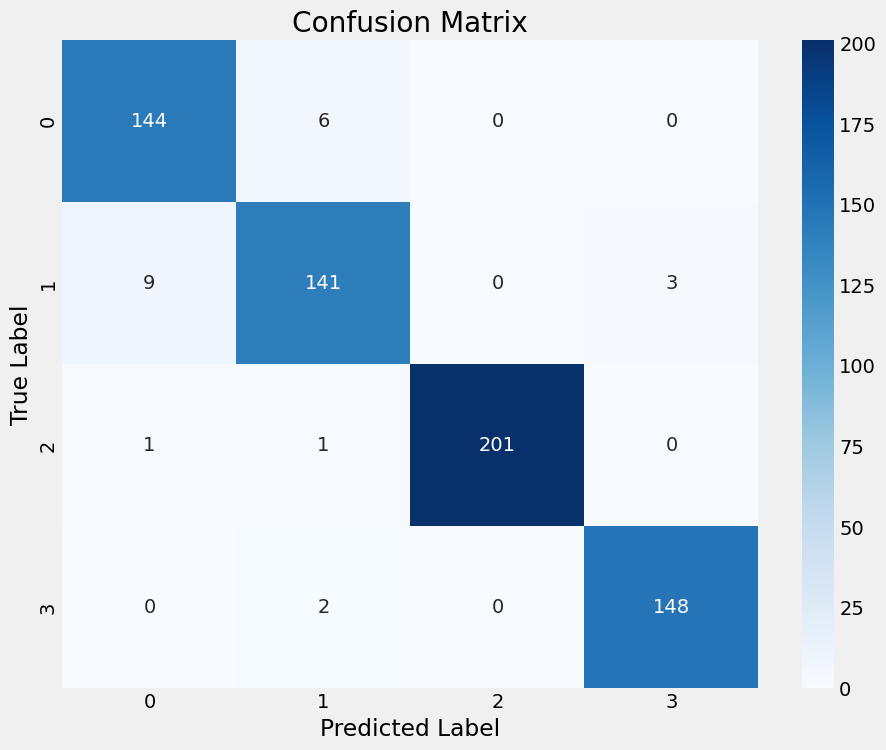

In [ ]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds,axis=1)

class_dict = {
    0:'glioma',
    1:'meaningioma',
    2:'no_tumor',
    3:'pituitary'
}

cm = confusion_matrix(ts_gen.classes,y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       150
           1       0.94      0.92      0.93       153
           2       1.00      0.99      1.00       203
           3       0.98      0.99      0.98       150

    accuracy                           0.97       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.97      0.97      0.97       656



In [ ]:
cnn_model.save("cnn_model.h5")

In [1]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 440.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.4 MB/s eta 0:00:00


In [2]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [18]:
%%writefile .env

GOOGLE_API_KEY= userdata.get()

Overwriting .env


In [19]:
PORT = 8515
app_path = "/content/app.py"

def run_streamlit():
  os.system(f"streamlit run {app_path} --server.port {PORT}")

In [20]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from dotenv import load_dotenv
load_dotenv()

genai.configure(api_key=os.getenv('GOOGLE_API_KEY'))

output_dir = 'saliency_maps'
os.makedirs(output_dir,exist_ok=True)

def generate_gemini_explanation(img_path,model_prediction,confidence):
  prompt = f""" You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
  The salliency map was generate by a deep learning model that was trained to classify brain tumors
  as either gioma, meningioma, pituitary or no tumor.

  The saliency map highlights the regions of the iamge the deep learning model is focusing on to make prediuction.

  The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence*100}%

  In your response:
  - Explain what regions of the brain the model is focuisng on, based on the saliency map. Refer to the regions highlighted in light cyan,
   those are the regions where the model is focusing on.
  - Explain possible reasons why the model made the prediction it did.
  - Don't mention anything like 'The saliency map highlights the regions the model is focusing on, which are in lgiht cyan in your explanation.
  - Keep your explanation to 5 sentences at max.

  Let's think step by step about this. Verify step by step.
  """

  img = PIL.Image.open(img_path)
  model = genai.GenerativeModel(model_name="gemini-1.5-flash")
  response = model.generate_content([prompt, img])
  #response = model.generate_content([prompt])

  return response.text

def generate_saliency_map(model, img_array, class_index, img_size):
  with tf.GradientTape() as tape:
    img_tensor =tf.convert_to_tensor(img_array)
    tape.watch(img_tensor)
    predictions = model(img_tensor)
    target_class = predictions[:,class_index]

  gradients = tape.gradient(target_class, img_tensor)
  gradients = tf.math.abs(gradients)
  gradients = tf.reduce_max(gradients,axis=-1)
  gradients = gradients.numpy().squeeze()

  #resize gradients to amtch orignal image sioze
  gradients = cv2.resize(gradients, img_size)

  #circualar mask for brain scan
  center = (gradients.shape[0]//2, gradients.shape[1]//2)
  radius = min(center[0],center[1])-10
  y, x = np.ogrid[:gradients.shape[0],:gradients.shape[1]]
  mask = (x-center[0])**2 +(y-center[1])**2 <= radius**2

  #apply mask to gradients
  gradients = gradients * mask

  #Normalize only the brain area
  brain_gradients = gradients[mask]
  if brain_gradients.max() > brain_gradients.min():
    brain_gradients = (brain_gradients - brain_gradients.min())/(brain_gradients.max() - brain_gradients.min())
  gradients[mask] = brain_gradients

  #higher thresholding
  threshold = np.percentile(gradients[mask],80)
  gradients[gradients < threshold] =0

  # aggressive smoothing
  gradients = cv2.GaussianBlur(gradients,(11,11),0)

  #heatmap overlay with enhaced contrast
  heatmap = cv2.applyColorMap(np.uint8(255 * gradients),cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

  heatmap = cv2.resize(heatmap, img_size)

  #superimposing heatmap on orignal image with increased opacity
  original_img = image.img_to_array(img)
  superimposed_img = heatmap * 0.7 + original_img * 0.3
  superimposed_img = superimposed_img.astype(np.uint8)

  img_path = os.path.join(output_dir, uploaded_file.name)
  with open(img_path,"wb") as f:
    f.write(uploaded_file.getbuffer())

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'

  #saliency maps
  cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))
  return superimposed_img

def load_xception_model(model_path):
  img_shape=(299,299,3)
  base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet",
                                              input_shape=img_shape, pooling='max')
  model = Sequential([
      base_model,
      Flatten(),
      Dropout(rate=0.3),
      Dense(128,activation='relu'),
      Dropout(rate=0.25),
      Dense(4,activation='softmax')
  ])
  model.build((None,)+img_shape)
  model.compile(Adamax(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy',
                         Precision(),
                         Recall()])
  model.load_weights(model_path)
  return model


st.title("Brain Tumor Classification")

st.write("Upload an image of a brain MRI scan to classify.")

uploaded_file = st.file_uploader("Choose an image...",type=["jpg","jpeg","png"])

if uploaded_file is not None:
  selected_model = st.radio(
      "Select Model",
      ("Transfer Learning - Xception","Custom CNN")
  )
  if selected_model == "Transfer Learning - Xception":
    model = load_xception_model("/content/drive/MyDrive/Brain Tumor Classification/xception_model.weights.h5")
    img_size = (299,299)
  else:
    model = load_model("/content/drive/MyDrive/Brain Tumor Classification/cnn_model.h5")
    img_size = (224,224)

  labels = ['Glioma','Meningioma','No Tumor', 'Pituitary']
  img = image.load_img(uploaded_file, target_size=img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array,axis=0)
  img_array /=255.0

  prediction = model.predict(img_array)

  class_index = np.argmax(prediction[0])
  result = labels[class_index]

  st.write(f"Predicted Class: {result}")
  st.write("Predicitons:")
  for label, prob in zip(labels,prediction[0]):
    st.write(f"{label}: {prob:.4f}")

  saliency_map = generate_saliency_map(model,img_array,class_index,img_size)

  col1,col2 = st.columns(2)
  with col1:
    st.image(uploaded_file,caption='Uploaded Image', use_container_width=True)
  with col2:
    st.image(saliency_map,caption="Saliency Map", use_container_width=True)

  st.write("## Classification Results")

  results_container = st.container()
  results_container.markdown(
      f"""
      <div style ="background-color: #000000; color: #FFFFFF; padding: 30px; border-radius: 15px;">
        <div style="display: flex; justify-content: space-between; align-items: center;">
          <div style="flex: 1; text-align:center;">
          <h3 style="color: #FFFFFF; margin-bottom:10px; font-size: 20px;">Prediction</h3>
          <p style="font-size:36px; font-weight:800; color: #FF0000; margin:0;">
          {result}
          </p>
          </div>
          <div style="width: 2px; height: 80px; background-color: #FFFFFF; margin: 0 20px;"></div>
          <div style = "flex: 1; text-align: center;">
            <h3 style="color: #FFFFFF; margin-bottom: 10px; font-size: 20px;">Confidence</h3>
            <p style="font-size: 36px; font-weight: 800; color: #2196F3; margin: 0;">
              {prediction[0][class_index]:.4%}
            </p>
          </div>
        </div>
      </div>
      """,
      unsafe_allow_html=True
  )

  # Prepare data for plotly chart
  probabilities = prediction[0]
  sorted_indices = np.argsort(probabilities)[::-1]
  sorted_labels = [labels[i] for i in sorted_indices]
  sorted_probabilities = probabilities[sorted_indices]


  # Create a plotly bar chart
  fig = go.Figure(go.Bar(
      x=sorted_probabilities,
      y=sorted_labels,
      orientation='h',
      marker_color=['red' if label == result else 'blue' for label in sorted_labels]
  ))

  #customize the chart layout
  fig.update_layout(
      title='Class Probabilities',
      xaxis_title='Probability',
      yaxis_title='Class',
      height=400,
      width=600,
      yaxis=dict(autorange="reversed")
  )

  # Add value labels to the bars
  for i, prob in enumerate(sorted_probabilities):
    fig.add_annotation(
        x=prob,
        y=i,
        text=f"{prob*100:.2f}%",
        showarrow=False,
        xanchor='left',
        xshift=5
    )

  st.plotly_chart(fig)

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  explanation = generate_gemini_explanation(saliency_map_path,result,prediction[0][class_index])

  st.write("## Explanation")
  st.write(explanation)


Overwriting app.py


In [21]:
thread = Thread(target=run_streamlit)
thread.start()

In [22]:
proto='http'

public_url = ngrok.connect(addr=str(PORT),proto=proto,bind_tls=True)

print("Public URL:",public_url)

Public URL: NgrokTunnel: "https://cc17-34-147-125-189.ngrok-free.app" -> "http://localhost:8515"


In [16]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
  ngrok.disconnect(tunnel.public_url)

Closing tunnel: https://18cb-34-147-125-189.ngrok-free.app -> http://localhost:8512
Closing tunnel: https://180f-34-147-125-189.ngrok-free.app -> http://localhost:8513
